In [1]:
from gascooling.accommodation.evaluation import experiment
import numpy as np
import pandas
from gascooling.accommodation.evaluation.experiment import CalibrationCollection

COOLDOWNS = [
    # ("2022-10-12T11:40:00Z", "2022-10-14T23:19:23Z", "T-testmass", "second run"),
    (
        "2023-01-11T08:28:00Z",
        "2023-01-11T13:14:00Z",
        "Temperature_Testmass_(K)",
        "live",
    ),
]

In [ ]:
for cooldown in COOLDOWNS:
    heating_calibration = experiment.heating.PowerMeterCalibration(
        start=cooldown[0],
        stop=cooldown[1],
        field=cooldown[2],
        measurement=cooldown[3],
        aggregation_window="10s",
    )

In [2]:
for cooldown in COOLDOWNS:
    heating_calibration = experiment.heating.LowPressureCalibration(
        start=cooldown[0],
        stop=cooldown[1],
        field=cooldown[2],
        measurement=cooldown[3],
        aggregation_window="10s",
    )
    # heating_calibration._download_data()
    pandas.set_option("display.max_rows", None)

    # print(heating_calibration.heating(200))
    # print(heating_calibration._calculate_heating())
    # print(heating_calibration.cooldown["_value"])

    heating_calibration.calibration_data_indexed_by_time["_value"].plot()

    starting_temperature = heating_calibration.calibration_data_indexed_by_time["_value"][0]
    # data = heating_calibration.simulate_cooldown(
    #    starting_temperature=213, seconds=100000, step_size=5
    # )
    # print(data)
    # data["temperatures"].plot()
    # data.plot()

    # heating_calibration.heating_powers_indexed_by_temperature.plot(
    #     xlim=(7, 175),
    #     ylim=(1e-4, 5e-1),
    #     logy=True,
    #     xlabel="Testmass temperature (K)",
    #     ylabel="Heating power (W)",
    # )
    # x_values = np.arange(10, 175)
    # fig = plt.Figure()
    # plt.plot(x_values, heating_calibration.interpolated_heating(x_values))

KeyboardInterrupt: 

In [1]:
cali = CalibrationCollection()
cooldown = cali.cooldowns[0]
df = cooldown.cooldown_data_indexed_by_time

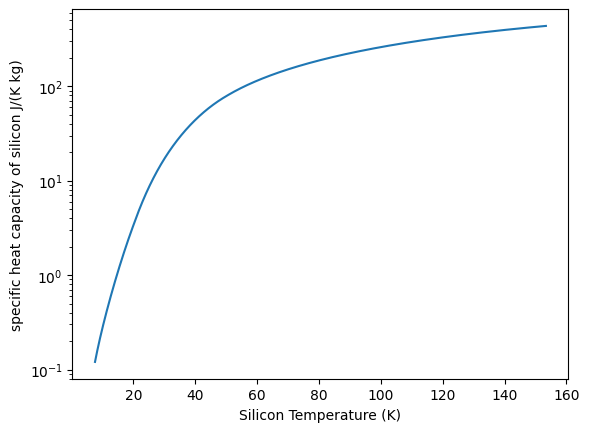

In [2]:
df_temp = a = cooldown.data_indexed_by_temperature
df_temp["specific heat"].plot(
    logy=True,
    ylabel="specific heat capacity of silicon J/(K kg)",
    xlabel="Silicon Temperature (K)",
).figure.savefig("figures/specific-heat-capacity-by-temp.pdf")
df_temp.to_csv("df_temp.csv")
d

In [11]:
df_temp[df_temp.index != np.NaN]

,result,table,_start,_stop,_measurement,Temperature_Testmass_(K),specific heat,temperature derivated,heating power (W)
_value,,,,,,,,,
7.595470,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,7.600189,0.120445,2.817425e-06,-1.591907e-07
7.595481,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,7.600200,0.120446,-3.604130e-07,2.036422e-08
7.595481,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,7.600200,0.120446,1.326320e-06,-7.494037e-08
7.595513,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,7.600230,0.120447,-2.883297e-06,1.629153e-07
7.595520,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,7.600237,0.120448,2.883297e-06,-1.629158e-07
...,...,...,...,...,...,...,...,...,...
153.335033,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,153.500833,435.300802,-1.439898e-03,1.508279e-01
153.348251,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,153.513889,435.339801,-1.307838e-03,1.370021e-01
153.361189,_result,0,2023-02-06 11:00:00+00:00,2023-02-08 09:02:00+00:00,live,153.526667,435.377971,-1.300311e-03,1.362209e-01


Text(0, 0.5, '$dT / dt $ (K/s)')

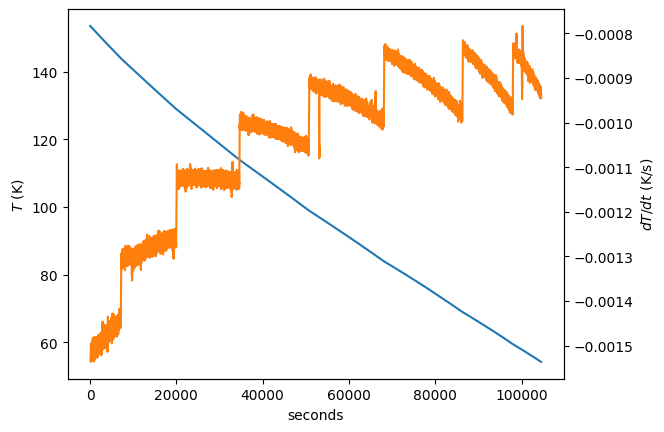

In [23]:
ax2 = df["_value"].plot(secondary_y=False)
ax2.set_ylabel("$T$ (K)")
ax1 = (
    df["temperature derivated"]
    .rolling(window=10)
    .median()
    .rolling(100)
    .mean()
    .plot(secondary_y=True)
)
ax1.set_ylabel("$dT / dt $ (K/s)")